# Mushroom use case 

## Data Description

The dataset contain 23 species of gilled mushrooms in the Agaricus and Lepiota Family. The task to train determining the mushroom are indentified ad definitely edible and definitely poisonous, The target is class column which is with the values of e and p which determine edible or poisonous

## Importing required libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [2]:
df=pd.read_csv('mushroom.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

###### checking the data dimension

In [4]:
df.shape

(8124, 23)

we have 8124 rows and 23 columns including the target column.

In [5]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

we have all columns are object dtype 

In [6]:
# checking the null values in dataset
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

There is no null value in dataset

### Find the unique values in columns

In [7]:
np.unique(df['class'])

array(['e', 'p'], dtype=object)

In [8]:
np.unique(df)

array(['?', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'l', 'm', 'n',
       'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'], dtype=object)

In [9]:
n = df.nunique(axis=0)
n

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

##### converting dataset into numeric value by using LabelEncoder

We need to convert the numeric formate, for that we have to use 2 different techniques 

1.for independent variabel columns we need to use ordinal encoder

2.for target column we need to use label encoder


In [10]:
i=df.drop("class",axis=1)
y=df['class']
i.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [11]:
y

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object

In [12]:
i.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [13]:
#from sklearn.preprocessing import OrdinalEncoder
en=OrdinalEncoder()
x=en.fit_transform(i)

In [14]:
x

array([[5., 2., 4., ..., 2., 3., 5.],
       [5., 2., 9., ..., 3., 2., 1.],
       [0., 2., 8., ..., 3., 2., 3.],
       ...,
       [2., 2., 4., ..., 0., 1., 2.],
       [3., 3., 4., ..., 7., 4., 2.],
       [5., 2., 4., ..., 4., 1., 2.]])

After converting object data to numeric data, it is store like array formate we need to convert that into dataframe

In [15]:
df1=pd.DataFrame(x)

In [16]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,5.0,2.0,4.0,1.0,6.0,1.0,0.0,1.0,4.0,0.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,2.0,3.0,5.0
1,5.0,2.0,9.0,1.0,0.0,1.0,0.0,0.0,4.0,0.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,3.0,2.0,1.0
2,0.0,2.0,8.0,1.0,3.0,1.0,0.0,0.0,5.0,0.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,3.0,2.0,3.0
3,5.0,3.0,8.0,1.0,6.0,1.0,0.0,1.0,5.0,0.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,2.0,3.0,5.0
4,5.0,2.0,3.0,0.0,5.0,1.0,1.0,0.0,4.0,1.0,...,2.0,7.0,7.0,0.0,2.0,1.0,0.0,3.0,0.0,1.0


In [17]:
#rename the column like original data 
df1.columns=i.columns

In [18]:
df1.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5.0,2.0,4.0,1.0,6.0,1.0,0.0,1.0,4.0,0.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,2.0,3.0,5.0
1,5.0,2.0,9.0,1.0,0.0,1.0,0.0,0.0,4.0,0.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,3.0,2.0,1.0
2,0.0,2.0,8.0,1.0,3.0,1.0,0.0,0.0,5.0,0.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,3.0,2.0,3.0
3,5.0,3.0,8.0,1.0,6.0,1.0,0.0,1.0,5.0,0.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,2.0,3.0,5.0
4,5.0,2.0,3.0,0.0,5.0,1.0,1.0,0.0,4.0,1.0,...,2.0,7.0,7.0,0.0,2.0,1.0,0.0,3.0,0.0,1.0


In [19]:
#from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
z=le.fit_transform(y)
z

array([1, 0, 0, ..., 0, 1, 0])

In [20]:
y1=pd.DataFrame(z,columns=['class'])

In [21]:
y1

,class
0,1
1,0
2,0
3,1
4,0
...,...
8119,0
8120,0
8121,0
8122,1


converting two dataframes to one by using concat function

In [22]:
df2=pd.concat([df1,y1],axis=1,join="inner")
df2

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,5.0,2.0,4.0,1.0,6.0,1.0,0.0,1.0,4.0,0.0,...,7.0,7.0,0.0,2.0,1.0,4.0,2.0,3.0,5.0,1
1,5.0,2.0,9.0,1.0,0.0,1.0,0.0,0.0,4.0,0.0,...,7.0,7.0,0.0,2.0,1.0,4.0,3.0,2.0,1.0,0
2,0.0,2.0,8.0,1.0,3.0,1.0,0.0,0.0,5.0,0.0,...,7.0,7.0,0.0,2.0,1.0,4.0,3.0,2.0,3.0,0
3,5.0,3.0,8.0,1.0,6.0,1.0,0.0,1.0,5.0,0.0,...,7.0,7.0,0.0,2.0,1.0,4.0,2.0,3.0,5.0,1
4,5.0,2.0,3.0,0.0,5.0,1.0,1.0,0.0,4.0,1.0,...,7.0,7.0,0.0,2.0,1.0,0.0,3.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3.0,2.0,4.0,0.0,5.0,0.0,0.0,0.0,11.0,0.0,...,5.0,5.0,0.0,1.0,1.0,4.0,0.0,1.0,2.0,0
8120,5.0,2.0,4.0,0.0,5.0,0.0,0.0,0.0,11.0,0.0,...,5.0,5.0,0.0,0.0,1.0,4.0,0.0,4.0,2.0,0
8121,2.0,2.0,4.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,...,5.0,5.0,0.0,1.0,1.0,4.0,0.0,1.0,2.0,0
8122,3.0,3.0,4.0,0.0,8.0,1.0,0.0,1.0,0.0,1.0,...,7.0,7.0,0.0,2.0,1.0,0.0,7.0,4.0,2.0,1


## Summary statistics

In [23]:
df2.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,0.567208,...,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616,0.482029
std,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,0.495493,...,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975,0.499708
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,...,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000,0.000000
50%,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,...,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000,0.000000
75%,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,...,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000,1.000000
max,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,...,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000,1.000000


obsevation:
1.The mean is more than median (50th percentile) in most of the columns that means their are so outliers in data 

##### Data Visualization

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


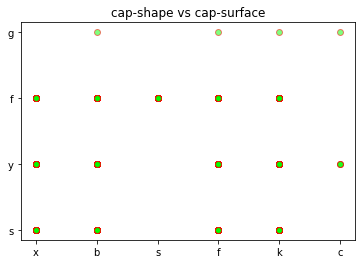

In [24]:
plt.scatter(df["cap-shape"],df["cap-surface"],alpha=0.5,c=(0,1,0),edgecolor='r')
plt.title("cap-shape vs cap-surface")
plt.show()

In [25]:
df2.isnull().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
class                       0
dtype: int64

there is no null values in the data

<AxesSubplot:>

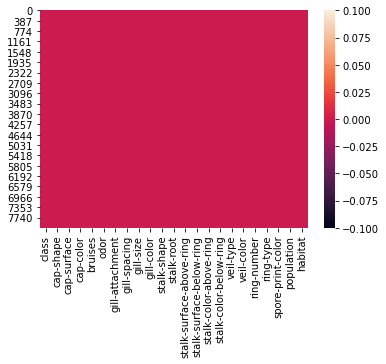

In [26]:
sns.heatmap(df.isnull())

if there is any null value we will get a different shade in the plot

### To check correlation

In [27]:
dfcor=df2.corr()
dfcor

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
cap-shape,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,0.063794,...,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221,0.052951
cap-surface,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,-0.014123,...,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887,0.178446
cap-color,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,-0.456496,...,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925,-0.031384
bruises,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,0.099364,...,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095,-0.501530
odor,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,0.459766,...,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610,-0.093552
gill-attachment,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,0.186485,...,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304,0.129200
gill-spacing,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,0.080895,...,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680,-0.348387
gill-size,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,0.214576,...,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418,0.540024
gill-color,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,-0.175699,...,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972,-0.530566
stalk-shape,0.063794,-0.014123,-0.456496,0.099364,0.459766,0.186485,0.080895,0.214576,-0.175699,1.000000,...,0.223439,0.235794,NaN,0.162604,-0.293221,-0.291444,0.258831,0.087383,-0.269216,-0.102019


<AxesSubplot:>

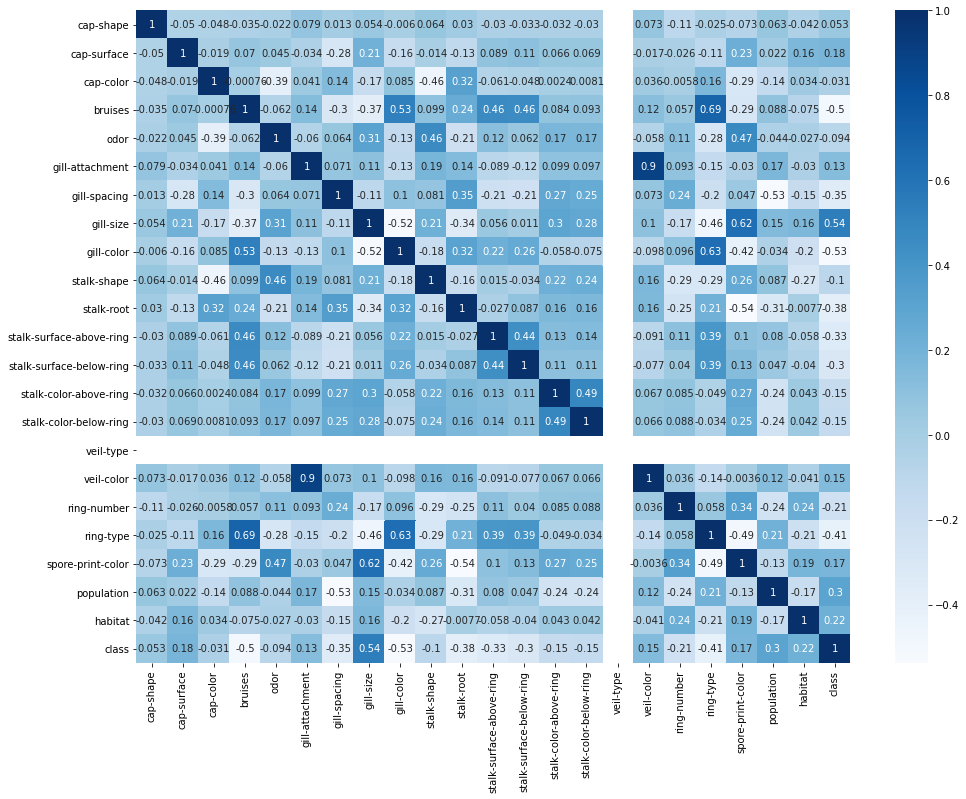

In [28]:
plt.figure(figsize=(16,12))
sns.heatmap(dfcor,cmap='Blues',annot=True)

Drak shade indicates the data is highly correlation. Target variable is not correlated with any of independent column

### Plotting outliers

In [29]:
df2.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat', 'class'],
      dtype='object')

In [30]:
df2.shape

(8124, 23)

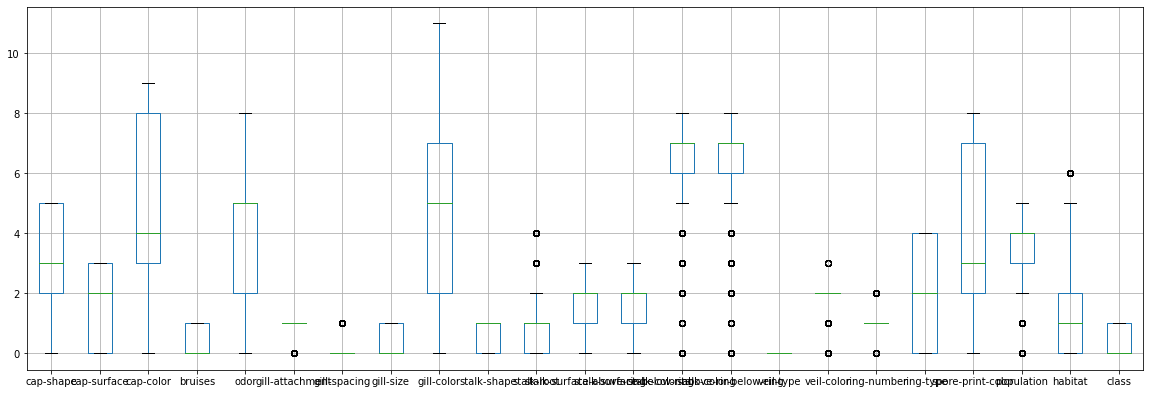

In [31]:
df2.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

we can see that we have some outliers in data and the most of the outliers are near to whiskers there are not an outliers

#### Identifing the target variable and features 

In [32]:
x=df2.drop('class',axis=1)
y=df2['class']

In [33]:
x.shape

(8124, 22)

In [34]:
y.shape

(8124,)

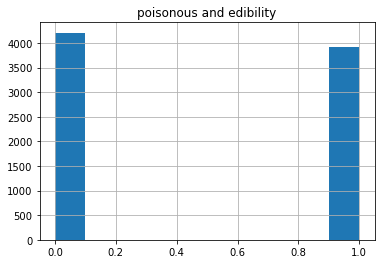

In [35]:
y.hist(grid=True)
plt.title("poisonous and edibility")
plt.show()

there is no sign of class imbalance 

### Finding best random_state

In [36]:
#from sklearn.metrics import accuracy_score
#from sklearn.model_selection import train_test_split

maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30,random_state=i)
    le=LogisticRegression()
    le.fit(x_train,y_train)
    pred=le.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy score is",maxAccu,"on random_state", maxRS)

Best accuracy score is 1.0 on random_state 14


We have found best random_state value as 14. We will create our train_test_split using this random_state(14)

### Creating train_test_split

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30,random_state=14)

In [38]:
#from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print("accuracy score:",accuracy_score(y_test,pred))
print("confusion matrix:",confusion_matrix(y_test,pred))
print("classification report:",classification_report(y_test,pred))

accuracy score: 1.0
confusion matrix: [[15  0]
 [ 0 15]]
classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [39]:
#from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred=dt.predict(x_test)
print("accuracy score:",accuracy_score(y_test,pred))
print("confusion matrix:",confusion_matrix(y_test,pred))
print("classification report:",classification_report(y_test,pred))

accuracy score: 1.0
confusion matrix: [[15  0]
 [ 0 15]]
classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [40]:
#from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print("accuracy score:",accuracy_score(y_test,pred))
print("confusion matrix:",confusion_matrix(y_test,pred))
print("classification report:",classification_report(y_test,pred))

accuracy score: 1.0
confusion matrix: [[15  0]
 [ 0 15]]
classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [41]:
#from sklearn.svm import SVM

svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print("accuracy score:",accuracy_score(y_test,pred))
print("confusion matrix:",confusion_matrix(y_test,pred))
print("classification report:",classification_report(y_test,pred))

accuracy score: 1.0
confusion matrix: [[15  0]
 [ 0 15]]
classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In all model we are getting same result, to know which model is best we need to do cross validation score then we can know which is the best model

In [42]:
#from sklearn.model_selection import cross_val_score
scr=cross_val_score(lr,x,y,cv=5)
print("Cross validation score of LogisticRegression model:",scr.mean())

Cross validation score of LogisticRegression model: 0.8389792345585448


In [43]:
scr=cross_val_score(dt,x,y,cv=5)
print("Cross validation score of LogisticRegression model:",scr.mean())

Cross validation score of LogisticRegression model: 0.9187383099658962


In [44]:
scr=cross_val_score(rf,x,y,cv=5)
print("Cross validation score of LogisticRegression model:",scr.mean())

Cross validation score of LogisticRegression model: 0.8954627510420614


In [45]:
scr=cross_val_score(svc,x,y,cv=5)
print("Cross validation score of LogisticRegression model:",scr.mean())

Cross validation score of LogisticRegression model: 0.841292231906025


Minimum difference in accuracy and cross validation score is for DecisionTreeClassifier so this is our best model

### Hyper parameter tuning

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
#creating parameter list to pass in GridSearchCV

parameters={'max_depth':np.arange(2,15),
           'criterion':['gini','entropy']}

In [48]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameters,cv=5)

In [49]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [50]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 7}

In [51]:
mod=DecisionTreeClassifier(criterion='gini',max_depth=7,random_state=14)

mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

100.0


### Saving the model

In [52]:
import joblib
joblib.dump(mod,"Mushroomproject.pkl")

['Mushroomproject.pkl']

### Loading the saved model

In [53]:
model=joblib.load("mushroomproject.pkl")

In [54]:
prediction=model.predict(x_test)

In [55]:
print(accuracy_score(y_test,prediction)*100)

100.0


In [56]:
prediction=pd.DataFrame(prediction) #converting into Data frame

In [57]:
prediction.to_csv("results.csv") #saving the predictions